In [ ]:
!pip install earthaccess
!pip install xarray
!pip install cartopy
!pip install matplotlib
!pip install cftime
!pip install h5netcdf

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import earthaccess
import os
import xarray as xr
import h5py
import folium
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm
%matplotlib inline
import glob

# **Aquisiçao dos dados**

In [ ]:
auth = earthaccess.login(persist=True)               #salvar os dados, para n ter q ficar logando toda vez que rodar o codigo

results = earthaccess.search_data(
    short_name="GPM_3IMERGDF",                         #GPM_3IMERGDF - Trabalha com dados por dia, GPM_3IMERGM - trabalha com dados a cada 30m
    version = '07',
    temporal = ('2024-01-01', '2024-01-30'),          #pegar dados pro mes de janeiro de 2024
    bounding_box = (-74, -34, -34, 5)                 #coordenadas que pega o brasil

)

print(len(results))

# Fazer o download para a pasta 'data'
arquivos_baixados = earthaccess.download(results, local_path='data')

# Verificar arquivos baixados
print("Arquivos baixados:")
print(arquivos_baixados)

#Caso for utilizar o de 30m, utilizar o codigo abaixo
# Filtrar arquivos com extensão .HDF5 ou .nc na pasta 'data'
#arquivos = [f for f in arquivos_baixados if f.endswith('.HDF5') or f.endswith('.nc')]

#Caso for utilizar o de Dia, utilizar o codigo abaixo
# Filtrar arquivos com extensão .HDF5 ou .nc4 na pasta 'data'
#rquivos = [f for f in arquivos_baixados if f.endswith('.HDF5') or f.endswith('.nc4')]
arquivos = sorted(glob.glob('data/3B-DAY.MS.MRG.3IMERG.202401*.nc4'))

# Tentar abrir o primeiro arquivo
if arquivos:
    ds = xr.open_dataset(arquivos[0])
    print(ds)
else:
    print("Nenhum arquivo .HDF5 ou .nc encontrado.")

30


QUEUEING TASKS | :   0%|          | 0/30 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/30 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/30 [00:00<?, ?it/s]

Arquivos baixados:
['data/3B-DAY.MS.MRG.3IMERG.20240101-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240102-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240103-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240104-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240105-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240106-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240107-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240108-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240109-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240110-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240111-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240112-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240113-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240114-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240115-S000000-E235959.V07B.nc4', 'data/3B-DAY.MS.MRG.3IMERG.20240116

In [ ]:
# Caso para 30m
'''
# Explorar os grupos e variáveis internas (caso seja HDF5 com grupos)
with h5py.File(arquivos[0], 'r') as f:
    def listar_grupos(nome, obj):
        if isinstance(obj, h5py.Dataset):
            print("Dataset:", nome)
        elif isinstance(obj, h5py.Group):
            print("Grupo:", nome)

    f.visititems(listar_grupos)
'''
#Caso para o Dia
# Abre o arquivo HDF5 e lista os grupos e datasets
with h5py.File(arquivos[0], 'r') as f:
    def listar_grupos(nome, obj):
        if isinstance(obj, h5py.Group):
            print(f"📁 Grupo: {nome}")
        elif isinstance(obj, h5py.Dataset):
            print(f"📄 Dataset: {nome} - shape: {obj.shape} - dtype: {obj.dtype}")

    print("📚 Estrutura do arquivo HDF5:")
    f.visititems(listar_grupos)

📚 Estrutura do arquivo HDF5:
📄 Dataset: MWprecipitation - shape: (1, 3600, 1800) - dtype: float32
📄 Dataset: MWprecipitation_cnt - shape: (1, 3600, 1800) - dtype: int8
📄 Dataset: MWprecipitation_cnt_cond - shape: (1, 3600, 1800) - dtype: int8
📄 Dataset: lat - shape: (1800,) - dtype: float64
📄 Dataset: lon - shape: (3600,) - dtype: float32
📄 Dataset: nv - shape: (2,) - dtype: >f4
📄 Dataset: precipitation - shape: (1, 3600, 1800) - dtype: float32
📄 Dataset: precipitation_cnt - shape: (1, 3600, 1800) - dtype: int8
📄 Dataset: precipitation_cnt_cond - shape: (1, 3600, 1800) - dtype: int8
📄 Dataset: probabilityLiquidPrecipitation - shape: (1, 3600, 1800) - dtype: int8
📄 Dataset: randomError - shape: (1, 3600, 1800) - dtype: float32
📄 Dataset: randomError_cnt - shape: (1, 3600, 1800) - dtype: int8
📄 Dataset: time - shape: (1,) - dtype: float64
📄 Dataset: time_bnds - shape: (1, 2) - dtype: float64


In [ ]:
# Abrir o arquivo com xarray
#ds = xr.open_dataset(arquivos[0], decode_times=True)
ds = xr.open_mfdataset(arquivos, combine='by_coords')

# Recorta apenas a área do Brasil.   Utilizei para reduzir a ram é conseguir rodar o codigo no google colab
ds_brasil = ds.sel(
    lon=slice(-74, -34),   # longitude: Oeste (negativo)
    lat=slice(-34, 5)      # latitude: Sul até Norte (de baixo pra cima!)
)

# Selecionar a variável de interesse
precip = ds_brasil['precipitation']  # ou, se preferir outra como MWprecipitation

# Converter para DataFrame
df = precip.to_dataframe().reset_index()
df

,time,lon,lat,precipitation
0,2024-01-01,-73.949997,-33.95,0.225
1,2024-01-01,-73.949997,-33.85,0.190
2,2024-01-01,-73.949997,-33.75,0.085
3,2024-01-01,-73.949997,-33.65,0.040
4,2024-01-01,-73.949997,-33.55,0.020
...,...,...,...,...
4679995,2024-01-30,-34.049999,4.55,0.590
4679996,2024-01-30,-34.049999,4.65,0.420
4679997,2024-01-30,-34.049999,4.75,0.440
4679998,2024-01-30,-34.049999,4.85,1.070


# Pre processamento e analise descritiva

In [ ]:
# Remoção dos valores ausentes (NaN) da coluna de precipitação
df = df.dropna(subset=['precipitation'])
df

,time,lon,lat,precipitation
0,2024-01-01,-73.949997,-33.95,0.225
1,2024-01-01,-73.949997,-33.85,0.190
2,2024-01-01,-73.949997,-33.75,0.085
3,2024-01-01,-73.949997,-33.65,0.040
4,2024-01-01,-73.949997,-33.55,0.020
...,...,...,...,...
4679995,2024-01-30,-34.049999,4.55,0.590
4679996,2024-01-30,-34.049999,4.65,0.420
4679997,2024-01-30,-34.049999,4.75,0.440
4679998,2024-01-30,-34.049999,4.85,1.070


In [ ]:
df.describe()

,time,lon,lat,precipitation
count,4680000,4.680000e+06,4.680000e+06,4.680000e+06
mean,2024-01-15 12:00:00,-5.400001e+01,-1.450000e+01,5.344551e+00
min,2024-01-01 00:00:00,-7.395000e+01,-3.395000e+01,0.000000e+00
25%,2024-01-08 00:00:00,-6.397500e+01,-2.425000e+01,0.000000e+00
50%,2024-01-15 12:00:00,-5.400000e+01,-1.450000e+01,4.250000e-01
75%,2024-01-23 00:00:00,-4.402500e+01,-4.750000e+00,5.035000e+00
max,2024-01-30 00:00:00,-3.405000e+01,4.950000e+00,3.986500e+02
std,NaN,1.152582e+01,1.125829e+01,1.238960e+01


In [ ]:
df['time'].value_counts()

,count
time,
2024-01-01,156000
2024-01-02,156000
2024-01-03,156000
2024-01-04,156000
2024-01-05,156000
2024-01-06,156000
2024-01-07,156000
2024-01-08,156000
2024-01-09,156000


# **Analise dos dados**

In [ ]:
# Coordenadas da estação
lat_estacao = -9.3664
lon_estacao = -36.4194
buffer = 0.1  # tamanho do quadrado (graus)

# Filtrando o DataFrame
df_filtrado = df[(df['lat'] >= lat_estacao - buffer) & (df['lat'] <= lat_estacao + buffer) &
    (df['lon'] >= lon_estacao - buffer) & (df['lon'] <= lon_estacao + buffer)
]
df_filtrado

,time,lon,lat,precipitation
146495,2024-01-01,-36.450001,-9.45,0.0
146496,2024-01-01,-36.450001,-9.35,0.0
146885,2024-01-01,-36.349998,-9.45,0.0
146886,2024-01-01,-36.349998,-9.35,0.0
302495,2024-01-02,-36.450001,-9.45,0.0
...,...,...,...,...
4514886,2024-01-29,-36.349998,-9.35,0.0
4670495,2024-01-30,-36.450001,-9.45,0.0
4670496,2024-01-30,-36.450001,-9.35,0.0
4670885,2024-01-30,-36.349998,-9.45,0.0


In [ ]:
df_filtrado['precipitation'].describe()

,precipitation
count,120.000000
mean,1.619333
std,6.050302
min,0.000000
25%,0.000000
50%,0.000000
75%,0.131250
max,38.309998


In [ ]:
df_agrupado=df_filtrado.groupby(['lon','lat'])['precipitation'].agg(['mean','sum','min','max'])
df_agrupado

mean        sum  min        max
lon        lat                                       
-36.450001 -9.45  1.657500  49.725002  0.0  32.700001
           -9.35  1.766667  53.000000  0.0  21.585001
-36.349998 -9.45  1.528833  45.864994  0.0  38.309998
           -9.35  1.524333  45.730000  0.0  35.820000

# **Estação de dados da ATV 2**

In [ ]:
#Lendo o banco de dados

#liberando o acesso aos arquivos do drive
from google.colab import drive
drive.mount('/content/drive')

#lendo o banco de dados (Dados pluviometricos)
banco_de_dados = pd.read_excel('/content/drive/MyDrive/df_atv2.xlsx')
banco_de_dados

Mounted at /content/drive


,EstacaoCodigo,Data,Valor,Codigo,Latitude,Longitude
0,936121,2025-02-01,0.0,936121,-9.3664,-36.4194
1,936121,2025-02-02,0.0,936121,-9.3664,-36.4194
2,936121,2025-02-03,0.0,936121,-9.3664,-36.4194
3,936121,2025-02-04,0.0,936121,-9.3664,-36.4194
4,936121,2025-02-05,0.7,936121,-9.3664,-36.4194
...,...,...,...,...,...,...
5017,936121,2011-06-26,0.1,936121,-9.3664,-36.4194
5018,936121,2011-06-27,0.0,936121,-9.3664,-36.4194
5019,936121,2011-06-28,0.0,936121,-9.3664,-36.4194
5020,936121,2011-06-29,0.0,936121,-9.3664,-36.4194


In [ ]:
#Filtrando os dados para o periodo de janeiro de 2024
banco_de_dados_filtrado = banco_de_dados[(banco_de_dados['Data']>='2024-01-01') & (banco_de_dados['Data']<='2024-01-30')]
banco_de_dados_filtrado


,EstacaoCodigo,Data,Valor,Codigo,Latitude,Longitude
394,936121,2024-01-01,0.0,936121,-9.3664,-36.4194
395,936121,2024-01-02,0.0,936121,-9.3664,-36.4194
396,936121,2024-01-03,0.0,936121,-9.3664,-36.4194
397,936121,2024-01-04,0.0,936121,-9.3664,-36.4194
398,936121,2024-01-05,0.0,936121,-9.3664,-36.4194
399,936121,2024-01-06,0.0,936121,-9.3664,-36.4194
400,936121,2024-01-07,0.0,936121,-9.3664,-36.4194
401,936121,2024-01-08,0.0,936121,-9.3664,-36.4194
402,936121,2024-01-09,0.0,936121,-9.3664,-36.4194
403,936121,2024-01-10,0.0,936121,-9.3664,-36.4194


In [ ]:
banco_de_dados_agrupado=banco_de_dados_filtrado.groupby(['Longitude','Latitude'])['Valor'].agg(['mean','sum','min','max'])
banco_de_dados_agrupado

,,mean,sum,min,max
Longitude,Latitude,,,,
-36.4194,-9.3664,0.246667,7.4,0.0,3.8


# **Comparação dos dados estatisticos**

In [ ]:
comparando = pd.concat([banco_de_dados_agrupado, df_agrupado])
comparando

mean        sum  min        max
-36.419400 -9.3664  0.246667   7.400000  0.0   3.800000
-36.450001 -9.4500  1.657500  49.725002  0.0  32.700001
           -9.3500  1.766667  53.000000  0.0  21.585001
-36.349998 -9.4500  1.528833  45.864994  0.0  38.309998
           -9.3500  1.524333  45.730000  0.0  35.820000

# **Geração do mapa a partir dos dados**

In [ ]:
df

,time,lon,lat,precipitation
0,2024-01-01,-73.949997,-33.95,0.225
1,2024-01-01,-73.949997,-33.85,0.190
2,2024-01-01,-73.949997,-33.75,0.085
3,2024-01-01,-73.949997,-33.65,0.040
4,2024-01-01,-73.949997,-33.55,0.020
...,...,...,...,...
4679995,2024-01-30,-34.049999,4.55,0.590
4679996,2024-01-30,-34.049999,4.65,0.420
4679997,2024-01-30,-34.049999,4.75,0.440
4679998,2024-01-30,-34.049999,4.85,1.070


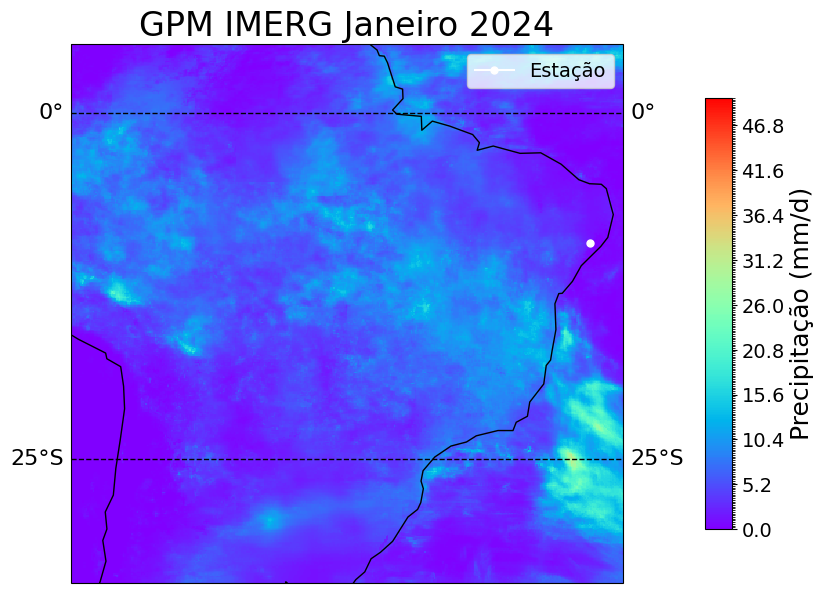

In [ ]:
# Gráfico para os dados gerais do Brasil

# Primeiro, converta os dados em grade (malha 2D)
lat = np.sort(df['lat'].unique())
lon = np.sort(df['lon'].unique())
precip_grid = df.pivot_table(index='lat', columns='lon', values='precipitation').values

# Configuração do gráfico
fig = plt.figure(figsize=(21, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Costas e grade
ax.coastlines(resolution="110m", linewidth=1)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([-60, -50, -25, 0, 25, 50, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}

# Níveis de contorno e normalização da coloração
clevs = np.arange(0, 50 + 0.1, 0.2)
norm = BoundaryNorm(clevs, ncolors=plt.cm.rainbow.N, clip=True)

# Mapa de cores
mesh = ax.pcolormesh(lon, lat, precip_grid, cmap=plt.cm.rainbow, norm=norm, shading='auto')

# Ponto da estação
ax.plot(lon_estacao, lat_estacao, marker='o', color='white', markersize=5, label='Estação')

# Legenda
ax.legend(loc='upper right', fontsize=14)

# Barra de cores
cb = plt.colorbar(mesh, ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('Precipitação (mm/d)', size=18)
cb.ax.tick_params(labelsize=14)

# Título
plt.title('GPM IMERG Janeiro 2024', size=24)

plt.show()


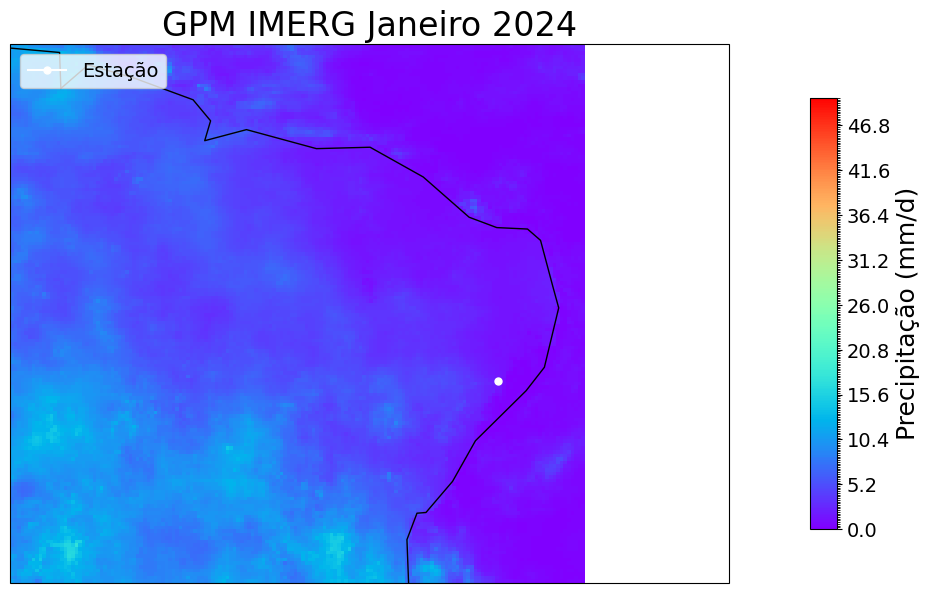

In [ ]:
#Grafico para os dados perto da estaçao

# Primeiro, converta os dados em grade (malha 2D)
lat = np.sort(df['lat'].unique())
lon = np.sort(df['lon'].unique())
precip_grid = df.pivot_table(index='lat', columns='lon', values='precipitation').values

# Configuração do gráfico
fig = plt.figure(figsize=(21, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-30, -50, -15, 0], crs=ccrs.PlateCarree())
#ax.set_extent([-36.5194, -36.3194, -9.4664, -9.2664], crs=ccrs.PlateCarree())
# Costas e grade
ax.coastlines(resolution="110m", linewidth=1)
gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([-60, -50, -25, 0, 25, 50, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'}


# Níveis de contorno e normalização da coloração
clevs = np.arange(0, 50 + 0.1, 0.2)
norm = BoundaryNorm(clevs, ncolors=plt.cm.rainbow.N, clip=True)

# Mapa de cores
mesh = ax.pcolormesh(lon, lat, precip_grid, cmap=plt.cm.rainbow, norm=norm, shading='auto')

# Ponto da estação
ax.plot(lon_estacao, lat_estacao, marker='o', color='white', markersize=5, label='Estação')

# Legenda
ax.legend(loc='upper left', fontsize=14)

# Barra de cores
cb = plt.colorbar(mesh, ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('Precipitação (mm/d)', size=18)
cb.ax.tick_params(labelsize=14)

# Título
plt.title('GPM IMERG Janeiro 2024', size=24)

plt.show()
